응용과제:
1. 8일차의 사과/파인애플/바나나 데이터를 가장자리 검출법을 이용하여 변환한 후, 클러스터링 결과 정확도를 비교해봅시다.

In [1]:
# 1번
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
fruits = np.load("C:\\Users\\user\\Desktop\\빅데이터 8기 김영규\\ML\\ML_week2\\Day7\\fruits_300.npy")

In [2]:
sobel_list = []
laplacian_list = []
canny_list = []

for fruit in fruits:
    
    sobel = cv2.Sobel(fruit, cv2.CV_8U, 1, 1, 3)
    laplacian = cv2.Laplacian(fruit, cv2.CV_8U, ksize=3)
    canny = cv2.Canny(fruit, 100, 200)

    sobel_list.append(sobel)
    laplacian_list.append(laplacian)
    canny_list.append(canny)

In [3]:
sobel_list_2d = np.array(sobel_list)
laplacian_list_2d = np.array(laplacian_list)
canny_list_2d = np.array(canny_list)

In [4]:
sobel_list_2d = sobel_list_2d.reshape(-1, 100*100)
laplacian_list_2d = laplacian_list_2d.reshape(-1, 100*100)
canny_list_2d = canny_list_2d.reshape(-1, 100*100)

In [5]:
pca = PCA(n_components=0.5)
km = KMeans(n_clusters=3, random_state=27)

In [5]:
# sobel
# pca

pca.fit(sobel_list_2d)
fruits_sob_pca = pca.transform(sobel_list_2d)
print(fruits_sob_pca.shape)

(300, 43)


In [6]:
# kmeans

km.fit(fruits_sob_pca)

KMeans(n_clusters=3, random_state=27)

In [7]:
print(km.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [8]:
print(km.inertia_)

380548895.0101671


In [9]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([100, 195,   5], dtype=int64))


In [10]:
def draw_fruits(arr, ratio=1):
    n = len(arr) # n은 샘플 개수입니다.
    # 한줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows <2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n개 까지만 그립니다.
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

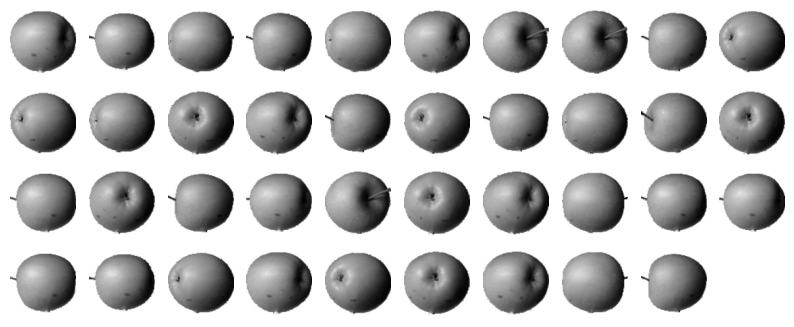

In [13]:
draw_fruits(fruits[km.labels_==2])

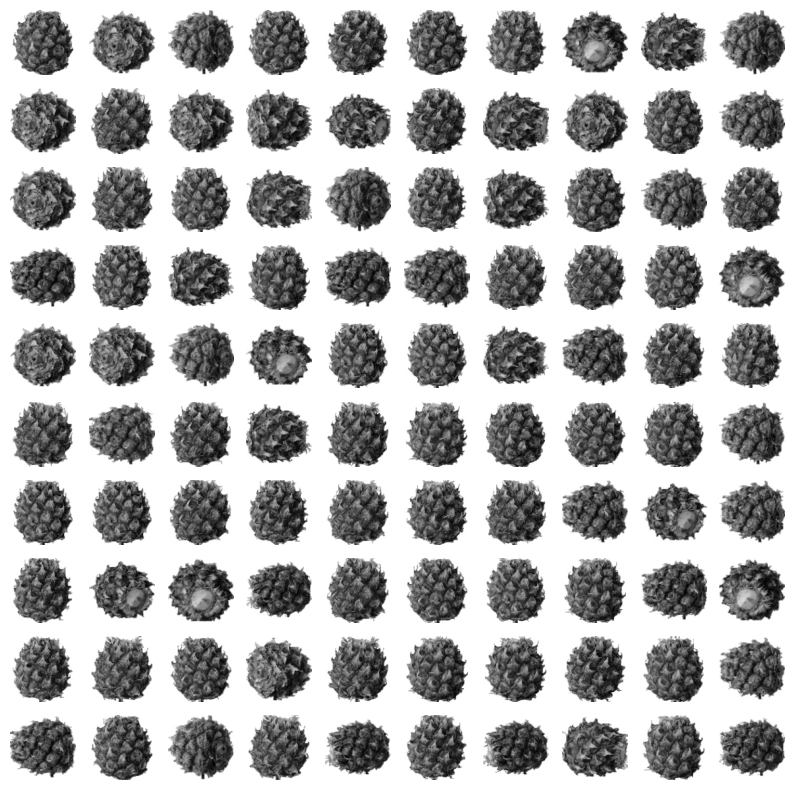

In [23]:
draw_fruits(fruits[km.labels_==0])

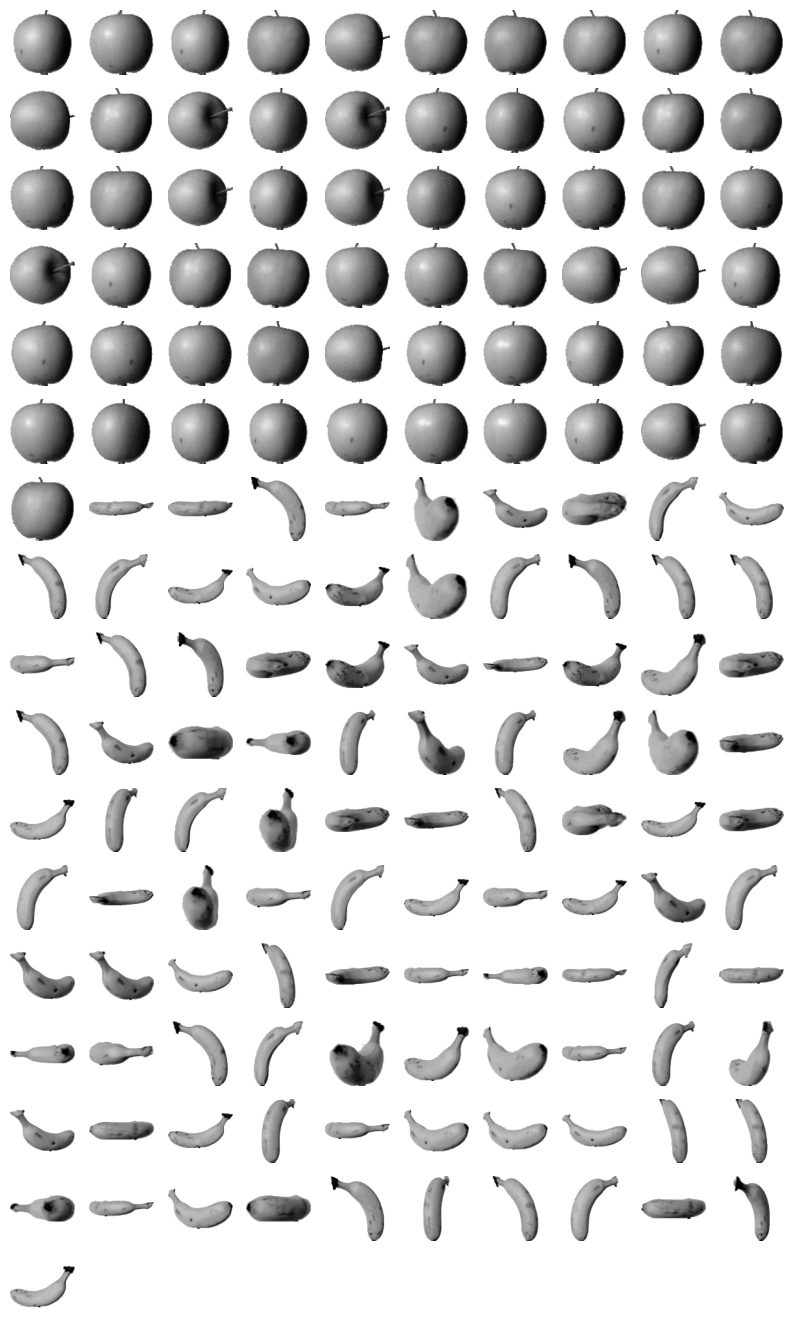

In [22]:
draw_fruits(fruits[km.labels_==1])

In [11]:
# laplacian
# pca
pca.fit(laplacian_list_2d)
fruits_lap_pca = pca.transform(laplacian_list_2d)
print(fruits_lap_pca.shape)

(300, 47)


In [12]:
# kmeans
km.fit(fruits_lap_pca)

KMeans(n_clusters=3, random_state=27)

In [13]:
print(km.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [14]:
print(km.inertia_)

3245768414.2569947


In [15]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([ 20,  80, 200], dtype=int64))


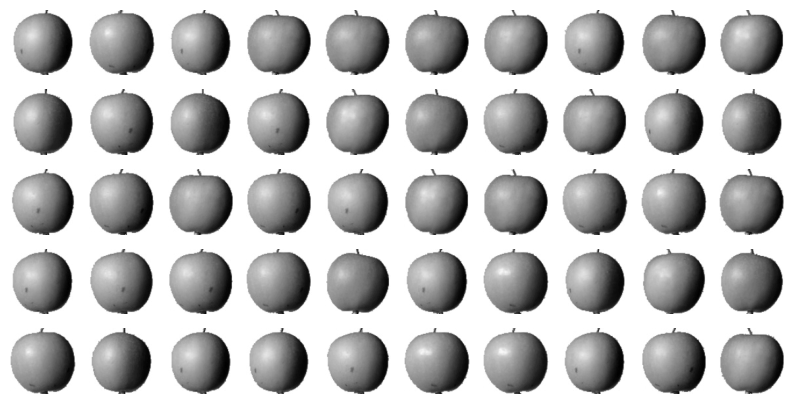

In [108]:
draw_fruits(fruits[km.labels_==2])

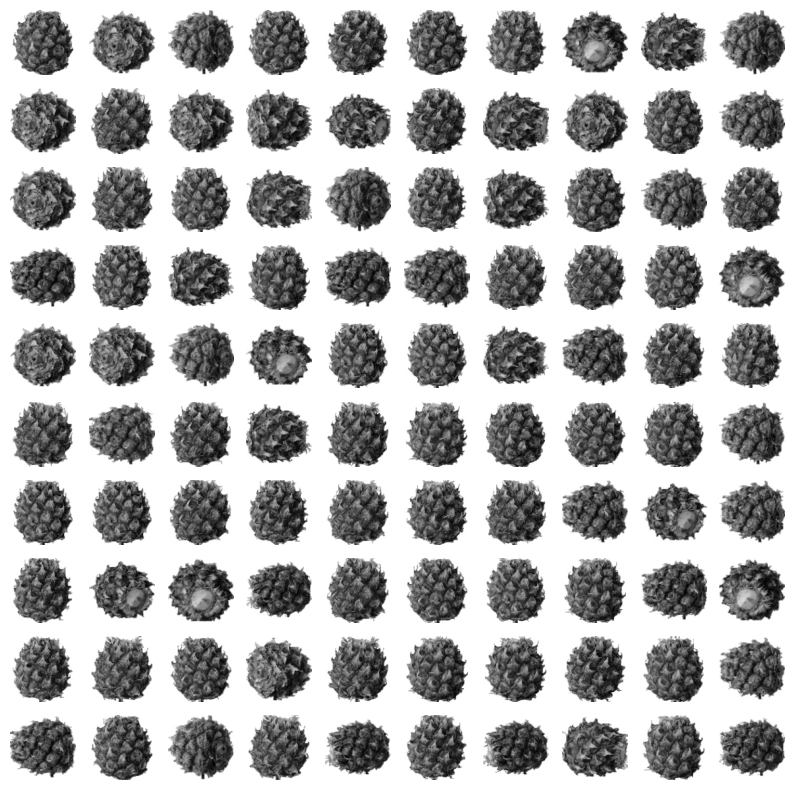

In [109]:
draw_fruits(fruits[km.labels_==0])

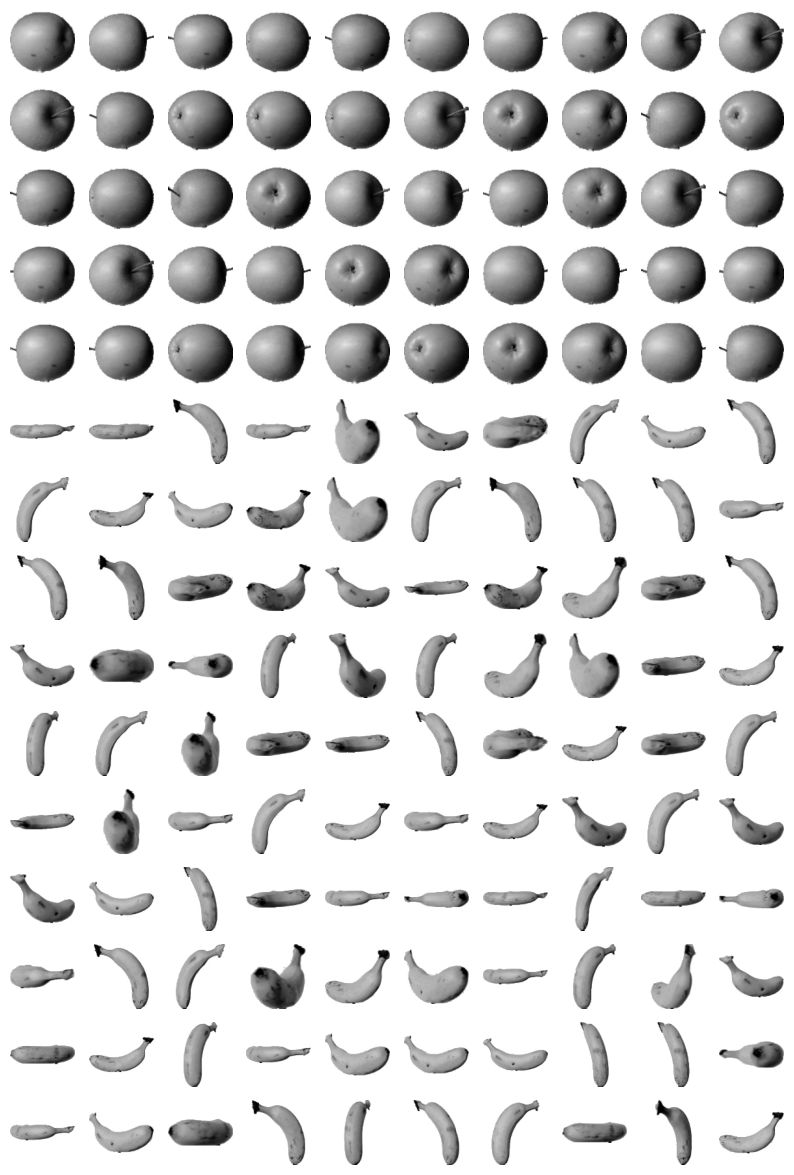

In [110]:
draw_fruits(fruits[km.labels_==1])

In [6]:
# canny
# pca
pca.fit(canny_list_2d)
fruits_canny_pca = pca.transform(canny_list_2d)
print(fruits_canny_pca.shape)

(300, 50)


In [7]:
# kmeans
km.fit(fruits_canny_pca)

KMeans(n_clusters=3, random_state=27)

In [8]:
print(km.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 0 1 1 1 1
 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [9]:
print(km.inertia_)

6307366378.926542


In [10]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([ 53,  47, 200], dtype=int64))


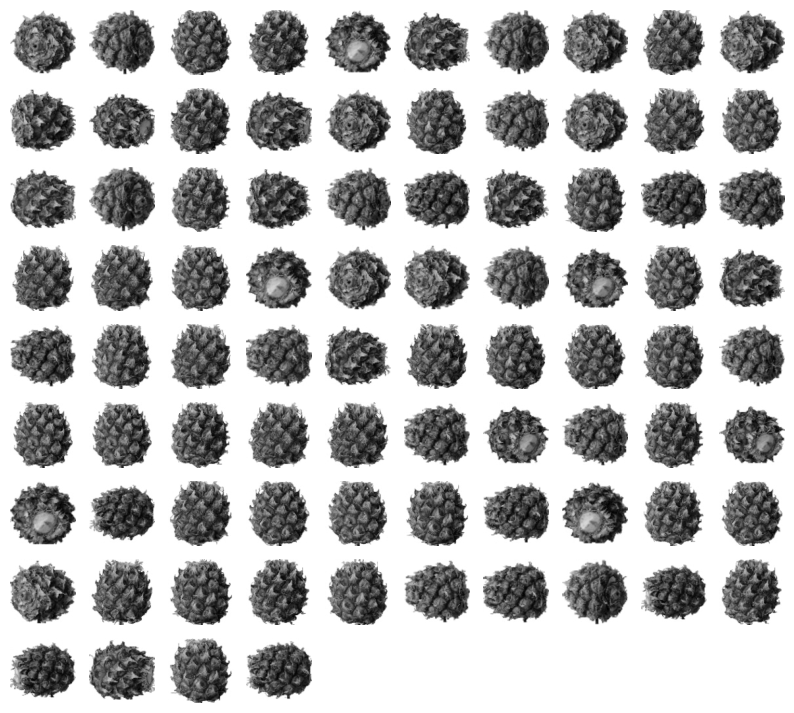

In [26]:
draw_fruits(fruits[km.labels_==2])

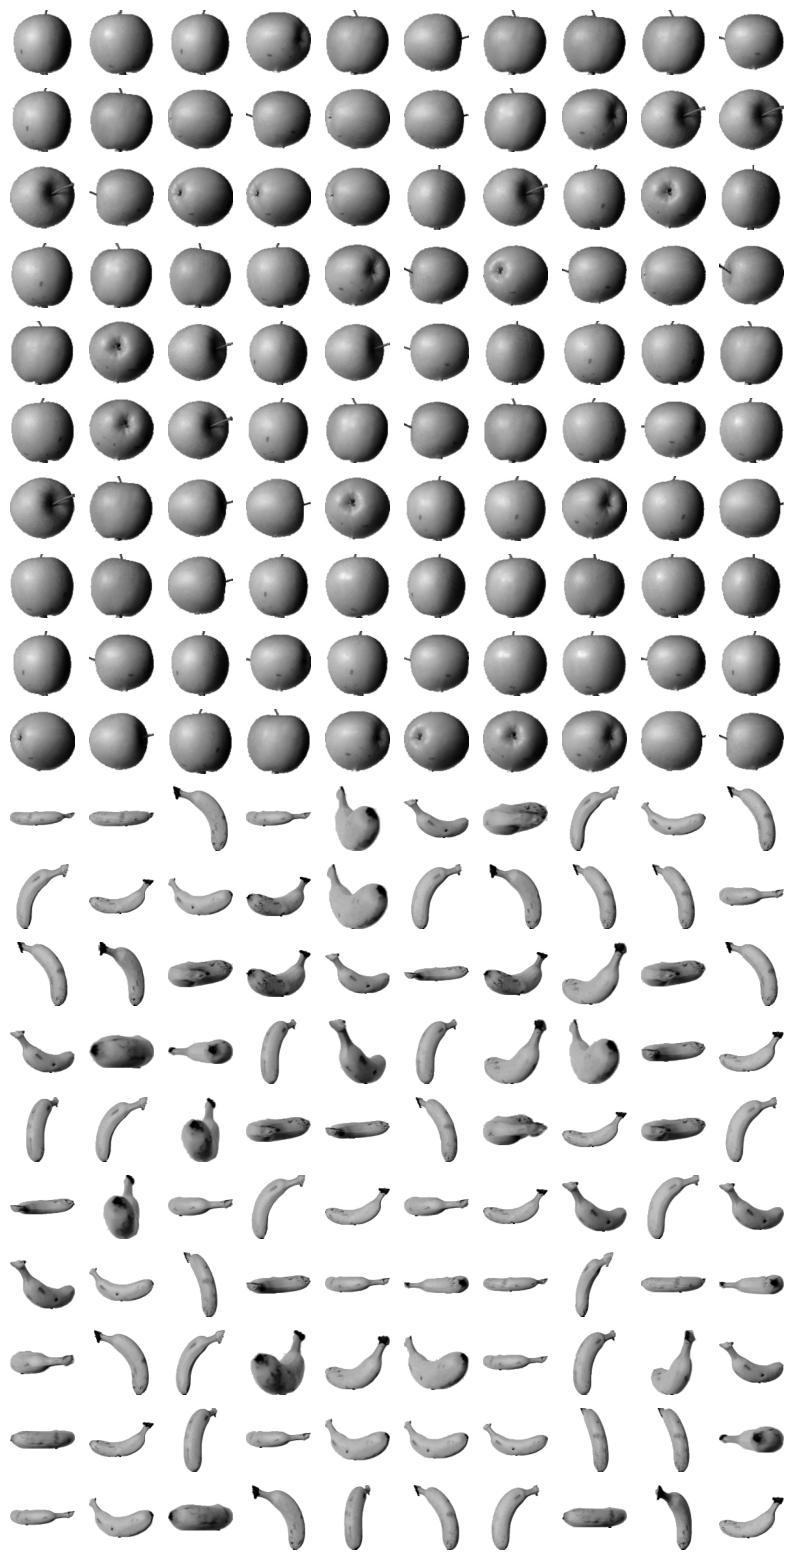

In [21]:
draw_fruits(fruits[km.labels_==1])

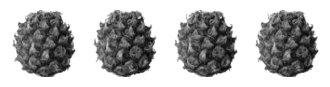

In [22]:
draw_fruits(fruits[km.labels_==0])